<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>

# Data Science for Businnes

## Prof. Eduardo Pécora

## Ridge Regression
Tempo estimado: **60** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Aplicar a Lasso Regression
* Estimar erros para vários valores de $\lambda$

## Bibliotecas

In [1]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtendo dados

In [2]:
# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/MeuAutoLimpo.csv"

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho)

#Obtendo colunas categóricas
cat = ['object']
df_cat = df.select_dtypes(include=cat)
df_cat

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
196,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [5]:
#Corrigindo problemas na feature 'make'
df_cat['make'] = df_cat['make'].replace({'bmw': 'BMW','doge':'dodge','volkswagen':'VW','volvo':'volv1'})

# Crie uma instância do codificador OneHotEncoder
encoder = OneHotEncoder()

# Ajuste e transforme os dados da coluna "make"
dummy_array = encoder.fit_transform(df_cat)

# Crie um DataFrame Pandas com as variáveis dummy
dummy_df = pd.DataFrame(dummy_array.toarray(), columns=encoder.get_feature_names_out())

# Concatene o DataFrame dummy com os outros dados
df_cat = pd.concat([df.drop(df.select_dtypes(include=cat).columns, axis=1), dummy_df], axis=1)

df_cat.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Train Test Split

In [6]:
X = df_cat[df_cat.drop(labels='price',axis='columns').columns]
Y = df_cat['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print("Shape train = ",X_train.shape)
print("Shape test = ",X_test.shape)

Shape train =  (150, 74)
Shape test =  (51, 74)


## Linear Regression

In [7]:
lm = LinearRegression()

lm.fit(X_train, y_train)

# Exibindo o R^2
R2=lm.score(X_test,y_test)

y_pred  = lm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = 100*mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 SCORE: %.4f" % R2)
print("MAE SCORE: %.4f" % mae)
print("MAPE SCORE: %.4f" % mape)
print("MSE SCORE: %.4f" % mse)
print("RMSE SCORE: %.4f" % rmse)

R2 SCORE: 0.9090
MAE SCORE: 1860.7925
MAPE SCORE: 11.6827
MSE SCORE: 9825060.2658
RMSE SCORE: 3134.4952


Text(45000, 3.3e-05, 'SCORE: 0.908954')

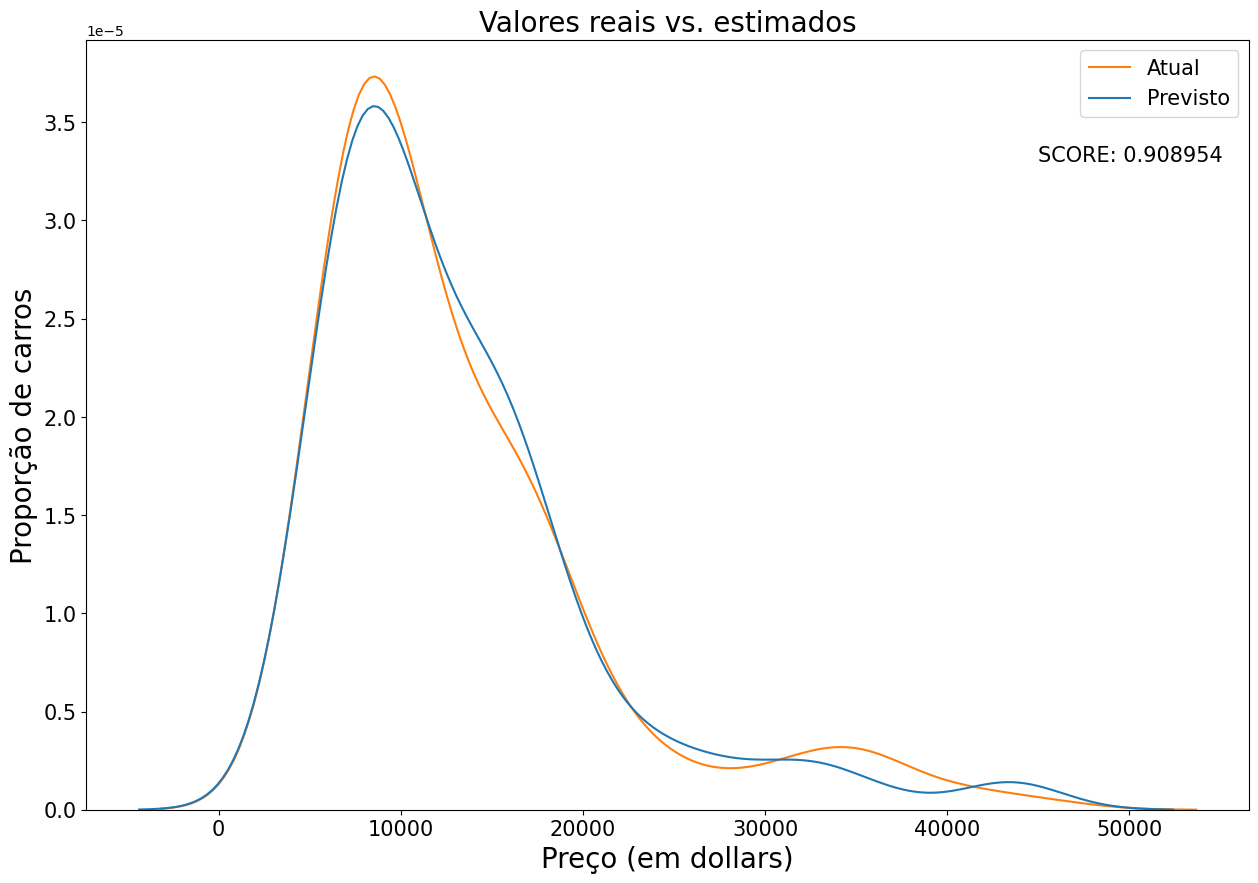

In [8]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = [lm.predict(X),df_cat['price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

## Tentando melhorar com regressão Ridge

In [12]:
ridge = Ridge(alpha=0.5)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

# Exibindo o R^2
R2=ridge.score(X_test,y_test)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_ridge)
mape = 100*mean_absolute_percentage_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)

print(f"R2 SCORE: {R2:.4f}")
print(f"MAE SCORE: {mae:.4f}")
print(f"MAPE SCORE: {mape:.4f}")
print(f"MSE SCORE: {mse:.4f}")

R2 SCORE: 0.9350
MAE SCORE: 1719.3224
MAPE SCORE: 11.7972
MSE SCORE: 7009029.9662


## Escolhendo um Alpha

Melhor Alpha R2:  0.43228228228228227
Melhor R2      :  0.9351814729697825


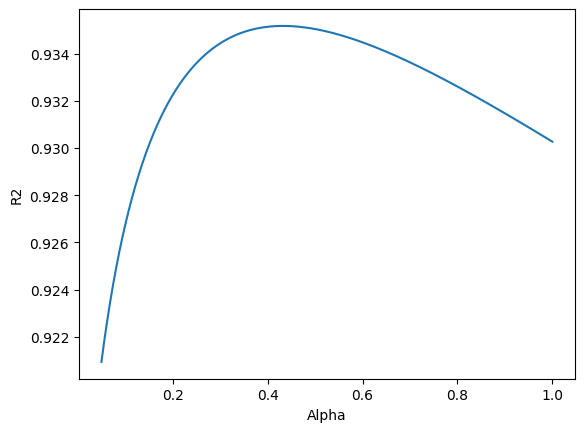

Melhor Alpha MAE:  0.3818818818818819
Melhor MAE      :  1717.2646819511822


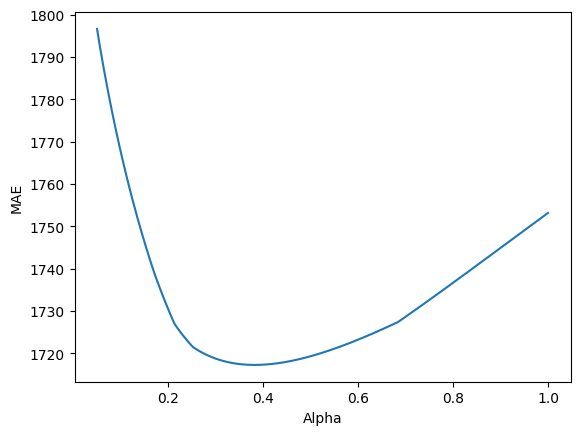

Melhor Alpha MAPE:  0.21356356356356354
Melhor MAPE      :  11.646946887528738


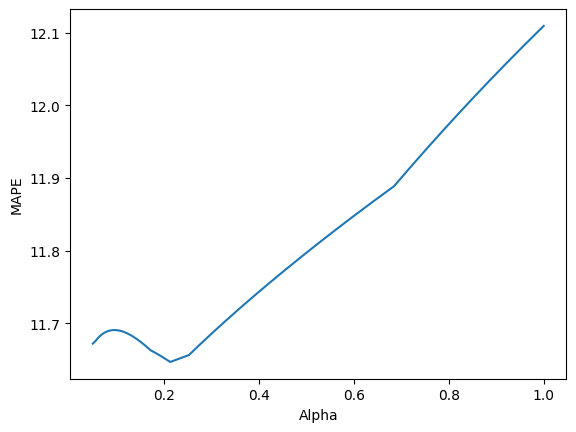

Melhor Alpha MSE:  0.43228228228228227
Melhor MSE      :  6994779.01732286


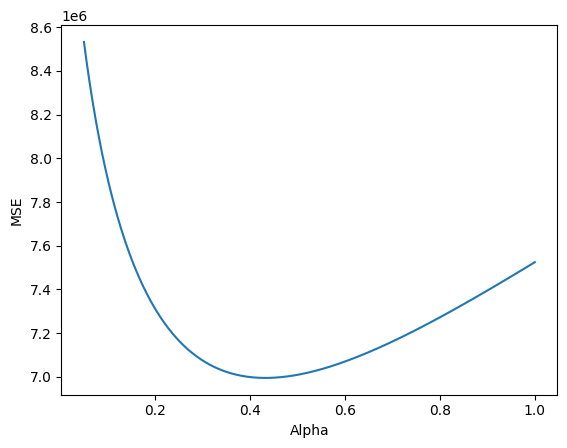

Melhor Alpha RMSE:  0.43228228228228227
Melhor RMSE      :  2644.7644540342076


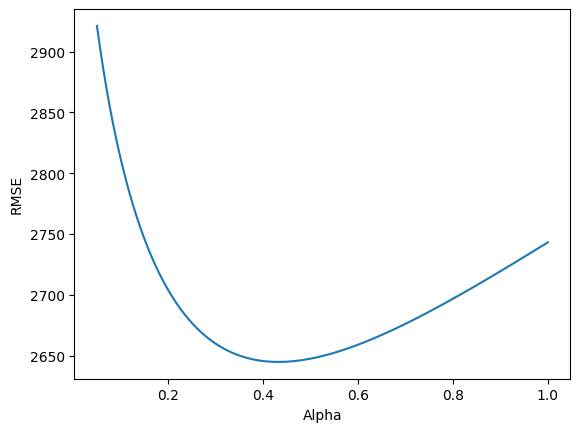

In [13]:
df_ridge = pd.DataFrame(columns=['Alpha', 'R2', 'MAE', 'MAPE', 'MSE', 'RMSE'])

#variando o intervalo
#scaled
#intervalo = np.linspace(0.05,30,1000)
#not scaled
intervalo = np.linspace(0.05,1,1000)

# Train a Ridge regression model
R2_best = 0
MAE_best = np.inf
MAPE_best = np.inf
MSE_best = np.inf
RMSE_best = np.inf
Alpha_R2 = 0
Alpha_MAE = 0
Alpha_MAPE = 0
Alpha_MSE = 0
Alpha_RMSE = 0
for i in intervalo:
    ridge = Ridge(alpha=i)  # alpha is the regularization strength
    ridge.fit(X_train, y_train)

    # Exibindo o R^2
    R2=ridge.score(X_test,y_test)
    #print("SCORE: %.4f" % R2)

    # Predict on the test set
    y_pred_ridge = ridge.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred_ridge)
    mape = 100*mean_absolute_percentage_error(y_test, y_pred_ridge)
    mse = mean_squared_error(y_test, y_pred_ridge)
    rmse = np.sqrt(mse)
    new_row = [i, R2, mae, mape, mse, rmse]
    df_ridge.loc[len(df_ridge)] = new_row
    if R2 > R2_best:
        R2_best = R2
        Alpha_R2 = i
    if mae < MAE_best:
        MAE_best = mae
        Alpha_MAE = i
    if mape < MAPE_best:
        MAPE_best = mape
        Alpha_MAPE = i
    if mse < MSE_best:
        MSE_best = mse
        Alpha_MSE = i
    if rmse < RMSE_best:
        RMSE_best = rmse
        Alpha_RMSE = i

print("Melhor Alpha R2: ", Alpha_R2)
print("Melhor R2      : ", R2_best)
sns.lineplot(data=df_ridge, x="Alpha", y="R2")
plt.show()

print("Melhor Alpha MAE: ", Alpha_MAE)
print("Melhor MAE      : ", MAE_best)
sns.lineplot(data=df_ridge, x="Alpha", y="MAE")
plt.show()

print("Melhor Alpha MAPE: ", Alpha_MAPE)
print("Melhor MAPE      : ", MAPE_best)
sns.lineplot(data=df_ridge, x="Alpha", y="MAPE")
plt.show()

print("Melhor Alpha MSE: ", Alpha_MSE)
print("Melhor MSE      : ", MSE_best)
sns.lineplot(data=df_ridge, x="Alpha", y="MSE")
plt.show()

print("Melhor Alpha RMSE: ", Alpha_RMSE)
print("Melhor RMSE      : ", RMSE_best)
sns.lineplot(data=df_ridge, x="Alpha", y="RMSE")
plt.show()

In [17]:
#Podemos escolher o melhor alpha dados os erros que queremos diminuir

print(f"Melhor Alpha R2: ", Alpha_R2)
print("Melhor R2      : ", R2_best)

print("Melhor Alpha MAE: ", Alpha_MAE)
print("Melhor MAE      : ", MAE_best)

print("Melhor Alpha MAPE: ", Alpha_MAPE)
print("Melhor MAPE      : ", MAPE_best)

print("Melhor Alpha MSE: ", Alpha_MSE)
print("Melhor MSE      : ", MSE_best)

print("Melhor Alpha RMSE: ", Alpha_RMSE)
print("Melhor RMSE      : ", RMSE_best)

Melhor Alpha R2:  0.43228228228228227
Melhor R2      :  0.9351814729697825
Melhor Alpha MAE:  0.3818818818818819
Melhor MAE      :  1717.2646819511822
Melhor Alpha MAPE:  0.21356356356356354
Melhor MAPE      :  11.646946887528738
Melhor Alpha MSE:  0.43228228228228227
Melhor MSE      :  6994779.01732286
Melhor Alpha RMSE:  0.43228228228228227
Melhor RMSE      :  2644.7644540342076


In [18]:
#Podemos escolher um alpha entre os que otimizaram o R2, MSE e RMSE e o que otimizou o MAE

alpha = (Alpha_MSE + Alpha_MAE)/2

#Ou podemos minimizar/maximizar a métrica de sua preferencia
#alpha = Alpha_R2

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# Exibindo o R^2
R2=ridge.score(X_test,y_test)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_ridge)
mape = 100*mean_absolute_percentage_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)

print("R2 SCORE: %.4f" % R2)
print("MAE SCORE: %.4f" % mae)
print("MAPE SCORE: %.4f" % mape)
print("MSE SCORE: %.4f" % mse)
print("RMSE SCORE: %.4f" % rmse)

R2 SCORE: 0.9352
MAE SCORE: 1717.3750
MAPE SCORE: 11.7474
MSE SCORE: 6997123.4194
RMSE SCORE: 2645.2076


Text(45000, 3.3e-05, 'SCORE: 0.935160')

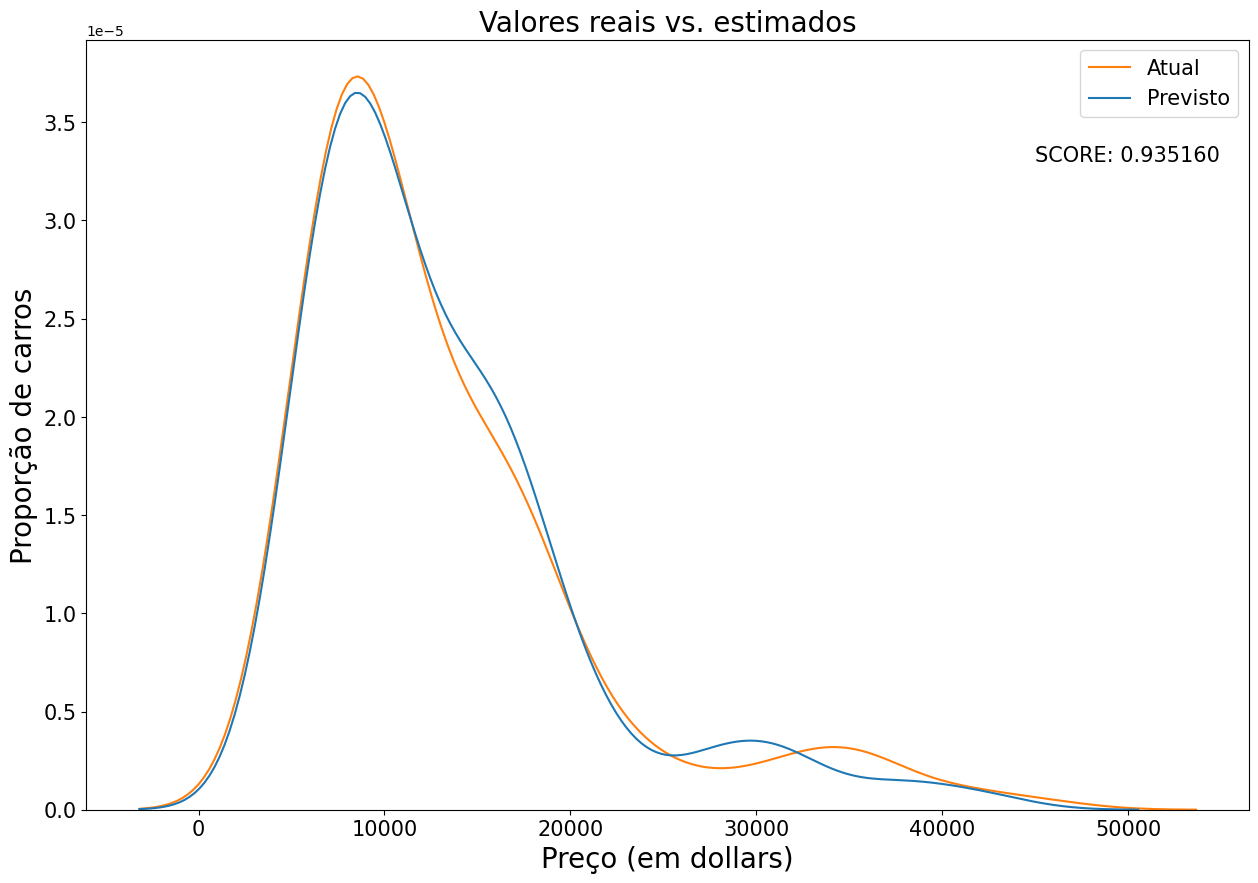

In [19]:
plt.figure(figsize=(15, 10))

#caso scaler tenha sido utilizado
#sns.kdeplot(data = [ridge.predict(scaler.transform(X)),df_cat['price']])
#caso contrário
sns.kdeplot(data = [ridge.predict(X),df_cat['price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!

## Referências:

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação do método <a href=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html>train_test_split</a>
* Documentação do método <a href=https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.Ridge.html>Ridge</a>



## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel S. Botelho</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 22-04-2024       | 1.0   | Eduardo Pecora    | Estrutura Aula        |
| 09-10-2024       | 1.1   | João Gabriel S. Botelho    | Atualizações       |

## <h3 align="center"> (c) Liga Data Science / UFPR 2024. All rights reserved. <h3/>
